In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import scipy 
import numpy as np
import random as rd
import nltk
import sklearn
from sklearn.neighbors import NearestNeighbors
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
from tqdm import tqdm

%matplotlib inline
nltk.download('stopwords')

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\igna-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

# Análisis exploratorio

In [2]:
identity = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

In [21]:
transaction.sample(n = 10)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
235004,3222004,0,5568141,107.95,W,11207,361.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
519465,3506465,0,13636010,59.00,W,4151,404.00,150.00,mastercard,102.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
347390,3334390,1,8553948,59.00,W,8397,310.00,150.00,mastercard,117.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
431314,3418314,0,10889569,554.00,W,9350,111.00,150.00,visa,162.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
150915,3137915,0,3106191,39.00,W,7862,239.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
500448,3487448,0,13119430,20.95,W,17217,111.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
510732,3497732,0,13373140,87.95,W,7919,194.00,150.00,mastercard,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
508469,3495469,0,13309805,47.95,W,7919,194.00,150.00,mastercard,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
439740,3426740,0,11139501,52.50,W,12932,361.00,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
394280,3381280,0,9912408,34.00,W,9400,111.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [25]:
identity.sample(n = 10)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
4061,3004179,-20.00,"220,693.00",nan,nan,0.00,0.00,nan,nan,nan,...,mobile safari 11.0,nan,NaN,NaN,F,F,F,T,mobile,NaN
65086,3155690,-5.00,"161,139.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,mobile safari 11.0,32.00,2208x1242,match_status:1,T,F,F,T,mobile,iOS Device
8201,3016460,-5.00,"92,616.00",nan,nan,0.00,0.00,nan,nan,nan,...,safari generic,24.00,2560x1440,match_status:2,T,F,F,T,desktop,MacOS
98336,3347161,-5.00,"441,424.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,chrome generic for android,nan,NaN,NaN,F,F,T,F,mobile,HTC Desire 10 lifestyle Build/MMB29M
99937,3355800,-5.00,"29,471.00",0.00,0.00,0.00,-9.00,nan,nan,0.00,...,chrome 64.0,24.00,1440x900,match_status:2,T,F,T,T,desktop,MacOS
24053,3054082,-20.00,nan,nan,nan,nan,nan,nan,nan,nan,...,NaN,nan,NaN,match_status:1,F,F,F,F,NaN,NaN
26115,3058453,-5.00,"116,933.00",0.00,0.00,0.00,0.00,nan,nan,0.00,...,firefox 57.0,24.00,1920x1080,match_status:2,T,F,T,T,desktop,Windows
32575,3070810,-5.00,"73,754.00",nan,nan,20.00,-13.00,nan,nan,0.00,...,chrome 62.0,24.00,1920x1080,match_status:2,T,F,T,T,desktop,Windows
91220,3299981,-5.00,"218,037.00",nan,nan,3.00,0.00,nan,nan,nan,...,ie 11.0 for desktop,nan,NaN,NaN,F,T,T,F,desktop,Trident/7.0
52163,3103672,0.00,"207,531.00",nan,nan,0.00,0.00,nan,nan,nan,...,samsung browser 6.2,32.00,NaN,match_status:2,T,F,T,T,mobile,SAMSUNG SM-N950U Build/NMF26X


In [5]:
porcentajePorTipo = transaction.loc[transaction.isFraud == 1].groupby(by = 'card4').count().iloc[:,1]
total = transaction.groupby(by = 'card4').count().iloc[:,1]
porcentajePorTipo = (porcentajePorTipo / total).reset_index()

In [6]:
porcentajePorTipo

,card4,isFraud
0,american express,0.03
1,discover,0.08
2,mastercard,0.03
3,visa,0.03


Text(0, 0.5, 'Probabilidad')

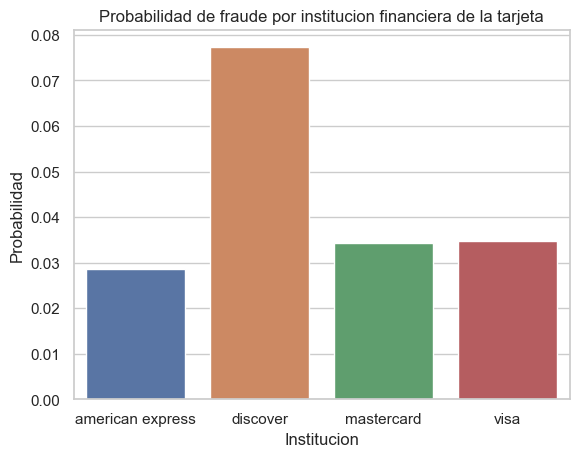

In [7]:
sns.barplot(data = porcentajePorTipo, x = 'card4', y = 'isFraud')
plt.title('Probabilidad de fraude por institucion financiera de la tarjeta')
plt.xlabel('Institucion')
plt.ylabel('Probabilidad')

In [8]:
transaction.isFraud.replace(0,'No', inplace = True)
transaction.isFraud.replace(1,'Si', inplace = True)
transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,No,86400,68.50,W,13926,nan,150.00,discover,142.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,2987001,No,86401,29.00,W,2755,404.00,150.00,mastercard,102.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,2987002,No,86469,59.00,W,4663,490.00,150.00,visa,166.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,2987003,No,86499,50.00,W,18132,567.00,150.00,mastercard,117.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,2987004,No,86506,50.00,H,4497,514.00,150.00,mastercard,102.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,No,15811047,49.00,W,6550,nan,150.00,visa,226.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590536,3577536,No,15811049,39.50,W,10444,225.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590537,3577537,No,15811079,30.95,W,12037,595.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
590538,3577538,No,15811088,117.00,W,7826,481.00,150.00,mastercard,224.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


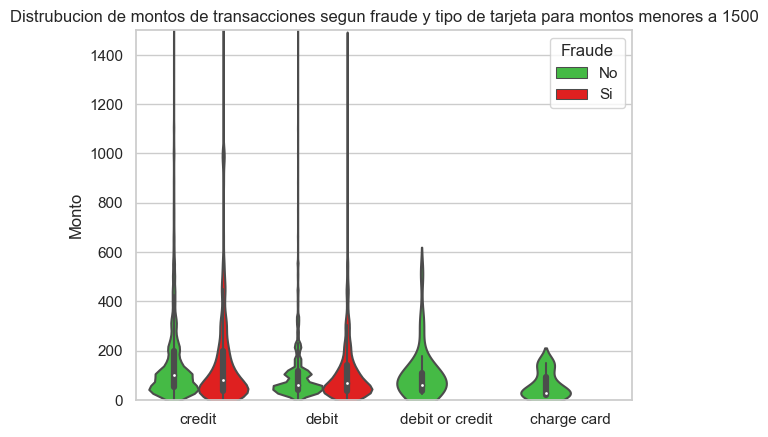

In [9]:
transaction['All'] = 1

ax = sns.violinplot( x= 'card6', y="TransactionAmt", hue="isFraud",

                 data=transaction.loc[transaction['TransactionAmt'] < 1500], palette = ['limegreen','red'], scale = 'width')
plt.title('Distrubucion de montos de transacciones segun fraude y tipo de tarjeta para montos menores a 1500')
plt.xlabel('')
plt.ylabel('Monto')
plt.ylim(0,1500)
plt.legend(title = "Fraude")
transaction.drop('All', axis=1, inplace=True)
plt.show()

In [10]:
mergeado = identity.merge(transaction, left_on='TransactionID', right_on='TransactionID',

          how = 'inner')

In [11]:
mergeado.id_31 = mergeado.id_31.astype(str)
mergeado.id_31

0             samsung browser 6.2
1              mobile safari 11.0
2                     chrome 62.0
3                     chrome 62.0
4                     chrome 62.0
                   ...           
144228    chrome 66.0 for android
144229    chrome 55.0 for android
144230    chrome 65.0 for android
144231                chrome 66.0
144232    chrome 66.0 for android
Name: id_31, Length: 144233, dtype: object

In [12]:
mergeado.id_31 = mergeado.id_31.map(lambda x : 'Google' if x.find('chrome') != -1 or x.find('google') != -1 else 
                                    'Safari' if x.find('safari') != -1 else 
                                    'Internet Explorer' if x.find('ie') != -1 or x.find('edge') != -1 else
                                    'Firefox' if x.find('firefox') != -1 else
                                    'Opera' if x.find('opera') != -1 else
                                    'Samsung Browser' if x.find('samsung') != -1 or x.find('Samsung') != -1 else
                                    'Others'
                                   )
mergeado.id_31.value_counts()

Google               76205
Safari               37281
Internet Explorer    16419
Firefox               7012
Others                4620
Samsung Browser       2247
Opera                  449
Name: id_31, dtype: int64

In [13]:
mergeado.ProductCD.value_counts()

C    62192
R    37548
H    32908
S    11585
Name: ProductCD, dtype: int64

In [14]:
heatmapplot = mergeado.loc[:,['isFraud','id_31','ProductCD']]
heatmapplot.isFraud.replace('No',0, inplace = True)
heatmapplot.isFraud.replace('Si',1, inplace = True)
heatmapplot.isFraud.replace('Yes',1, inplace = True)
heatmapplot = heatmapplot.groupby(['id_31','ProductCD']).sum() / heatmapplot.groupby(['id_31','ProductCD']).count()
heatmapplot.reset_index().set_index('id_31')

heatmapplot = pd.pivot_table(heatmapplot, values='isFraud', index=['id_31'],

                    columns=['ProductCD'], aggfunc=np.sum)
heatmapplot

ProductCD,C,H,R,S
id_31,,,,
Firefox,0.12,0.09,0.03,0.05
Google,0.14,0.05,0.03,0.07
Internet Explorer,0.07,0.02,0.02,0.03
Opera,0.35,0.03,0.28,0.00
Others,0.08,0.02,0.03,0.10
Safari,0.09,0.04,0.06,0.08
Samsung Browser,0.07,0.11,0.14,0.09


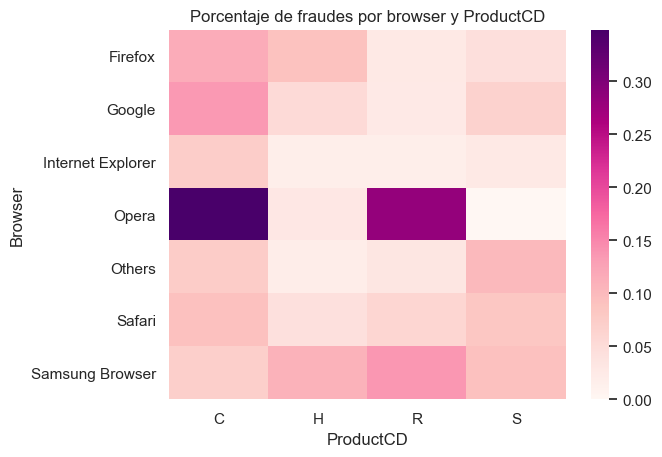

In [15]:

ax = sns.heatmap(heatmapplot, cmap='RdPu')
plt.title('Porcentaje de fraudes por browser y ProductCD')
plt.ylabel('Browser')
plt.show()

In [16]:
top6 = transaction.P_emaildomain.value_counts().nlargest(6).index.to_list()
filtrados = transaction.where(lambda x : x['P_emaildomain'].isin(top6))

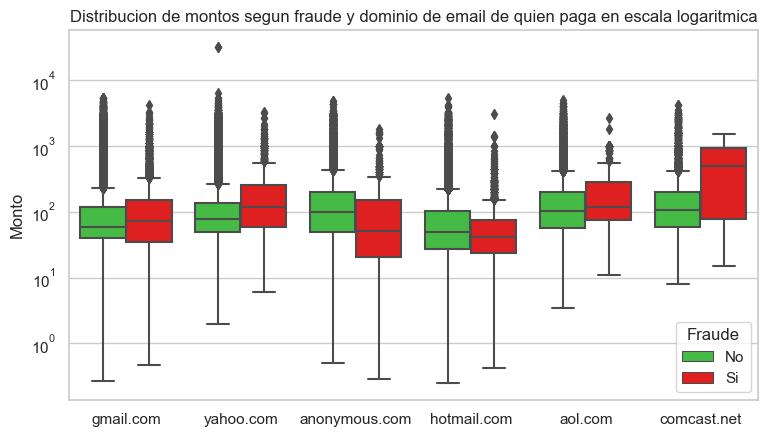

In [17]:
transaction['All'] = 1
plt.figure(figsize =  [8.9, 4.8],dpi = 100)

ax = sns.boxplot( x= 'P_emaildomain', y="TransactionAmt", hue="isFraud",

                 data= filtrados, palette = ['limegreen','red'])
plt.title('Distribucion de montos segun fraude y dominio de email de quien paga en escala logaritmica')
plt.xlabel('')
plt.ylabel('Monto')
plt.yscale('log')
plt.legend(title = "Fraude")
transaction.drop('All', axis=1, inplace=True)
plt.show()

In [18]:
transaction.sample(n = 10).iloc[:,0:18]

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1
301139,3288139,No,7430791,117.00,W,8406,264.00,150.00,visa,226.00,debit,433.00,87.00,"4,350.00",nan,yahoo.com,NaN,1.00
83535,3070535,No,1791167,60.00,H,10616,583.00,150.00,visa,226.00,credit,225.00,87.00,nan,nan,anonymous.com,gmail.com,1.00
109975,3096975,No,2155153,39.00,W,8691,599.00,150.00,visa,166.00,debit,327.00,87.00,nan,nan,NaN,NaN,4.00
575546,3562546,No,15288091,117.00,W,6932,478.00,150.00,visa,166.00,debit,441.00,87.00,nan,nan,gmail.com,NaN,1.00
270228,3257228,No,6554426,100.00,R,13809,583.00,150.00,visa,226.00,credit,123.00,87.00,nan,nan,gmail.com,gmail.com,1.00
409736,3396736,No,10353925,29.00,C,13832,375.00,185.00,mastercard,224.00,debit,nan,nan,nan,1.00,hotmail.com,hotmail.com,5.00
295987,3282987,No,7319629,87.00,W,17729,300.00,150.00,visa,166.00,debit,337.00,87.00,14.00,nan,gmail.com,NaN,1.00
152507,3139507,No,3166139,57.95,W,10856,268.00,150.00,visa,166.00,debit,325.00,87.00,nan,nan,gmail.com,NaN,88.00
9736,2996736,No,294586,100.00,W,4085,369.00,150.00,mastercard,224.00,debit,181.00,87.00,nan,nan,gmail.com,NaN,2.00
222911,3209911,Si,5256531,9.67,C,10876,104.00,185.00,visa,137.00,credit,nan,nan,nan,7.00,gmail.com,gmail.com,5.00


Text(0, 0.5, 'Frecuencia')

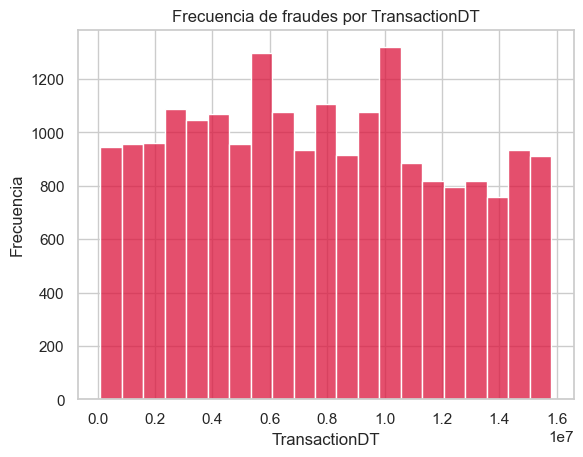

In [19]:
frauds = transaction.loc[transaction['isFraud'] == 'Si']
sns.histplot(data=frauds, x="TransactionDT",bins = 21 ,color = 'crimson')
plt.title('Frecuencia de fraudes por TransactionDT')
plt.ylabel('Frecuencia')

<AxesSubplot:>

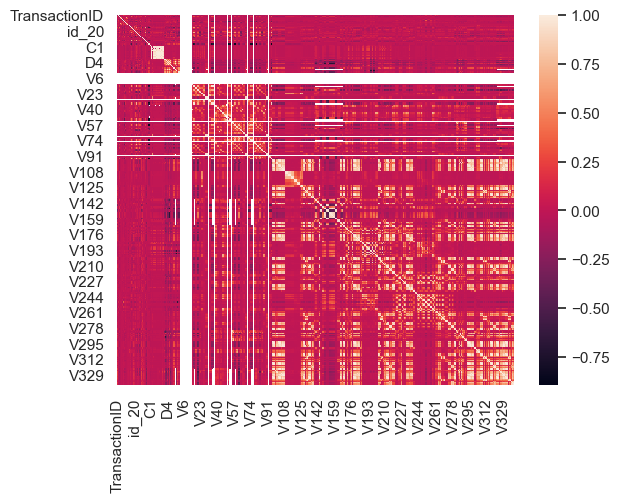

In [20]:
sns.heatmap(mergeado.corr())

# Parte II:

In [17]:
identity = pd.read_csv('train_identity.csv')
transaction = pd.read_csv('train_transaction.csv')

In [18]:
mergeado = identity.merge(transaction, left_on='TransactionID', right_on='TransactionID',

          how = 'inner')

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Spliteo el 20% con el delta tiempo mayor

In [20]:
test_lenght = int(144233*0.2)
mergeado.sort_values(by = "TransactionDT")
train_lenght = (144233- test_lenght)
train = mergeado.iloc[0:train_lenght ,:]
test = mergeado.iloc[(144233- test_lenght):144233,:]

Encodeo el train set y el validation set

In [21]:
train['id_30'] = train.astype(str).id_30.map(lambda x : 'Windows ' if x.find('Windows') != -1 else 
                                    'iOS' if x.find('iOS') != -1 else 
                                    'MacOs ' if x.find('MacOs') != -1 else
                                    'Desconocido' if x.find('nan') != -1 else
                                    'Mac' if x.find('Mac') != -1 else
                                    'Linux' if x.find('Linux') != -1 else
                                    'Others'
                                   )

train.id_31 = train.astype(str).id_31.map(lambda x : 'Google' if x.find('chrome') != -1 or x.find('google') != -1 else 
                                    'Safari' if x.find('safari') != -1 else 
                                    'Internet Explorer' if x.find('ie') != -1 or x.find('edge') != -1 else
                                    'Firefox' if x.find('firefox') != -1 else
                                    'Opera' if x.find('opera') != -1 else
                                    'Samsung Browser' if x.find('samsung') != -1 or x.find('Samsung') != -1 else
                                    'Others'
                                   )

train.DeviceInfo = train.astype(str).DeviceInfo.map(lambda x : 'Windows' if x.find('Windows') != -1 else 
                                    'iOS' if x.find('iOS') != -1 else 
                                    'Mac ' if x.find('Android') != -1 else
                                    'rv' if x.find('rv') != -1 else
                                    'Mac' if x.find('Mac') != -1 else
                                    'SM' if x.find('SM') != -1 else
                                    'Others'
                                   )



X_cat = ['ProductCD','card4','id_34','id_15','id_23','id_30','id_31','DeviceType','DeviceInfo' ,'card6','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9']

cont_df = train.drop(X_cat,axis =1)
cont_df['id_12'] = cont_df['id_12'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_13'] = cont_df['id_13'].astype(float).fillna(cont_df['id_13'].mean()) 
cont_df['id_16'] = cont_df['id_16'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_27'] = cont_df['id_27'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_28'] = cont_df['id_28'].replace('Found',1).replace('New',0).astype(float)
cont_df['id_29'] = cont_df['id_29'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_13'] = cont_df['id_13'].astype(float).fillna(cont_df['id_13'].mean()) 
cont_df.id_33 = cont_df.id_33.astype(str).map(lambda x : 'nan' if x.find('nan') != -1 else
                                               int(x.split('x')[0])*int(x.split('x')[1])).astype(float)
media = cont_df.id_33.mean()
cont_df.id_33 = cont_df.id_33 /media
cont_df['id_35'] = cont_df['id_35'].replace('T',1).replace('F',0).astype(float)
cont_df['id_36'] = cont_df['id_36'].replace('T',1).replace('F',0).astype(float)
cont_df['id_37'] = cont_df['id_37'].replace('T',1).replace('F',0).astype(float)
cont_df['id_38'] = cont_df['id_38'].replace('T',1).replace('F',0).astype(float)

cont_df.apply(lambda x: x.fillna(x.mean(),inplace = True)) 
cont_df.apply(lambda x: x.fillna(0,inplace = True)) 
cat_df = train[X_cat].fillna('Others')

In [22]:
encoders = []
for columna in X_cat:    
    ohe = OneHotEncoder()  # drop='first'
    encoded_data = (ohe.fit_transform(cat_df[[columna]].astype(str)).todense().astype(int))
    encoders.append(ohe)
    encoded_data = pd.DataFrame(encoded_data, index = cont_df.index ).add_prefix(columna[0:5])
    cont_df = pd.concat([cont_df, encoded_data], axis=1)
train = cont_df

In [25]:
test['id_30'] = test.astype(str).id_30.map(lambda x : 'Windows ' if x.find('Windows') != -1 else 
                                    'iOS' if x.find('iOS') != -1 else 
                                    'MacOs ' if x.find('MacOs') != -1 else
                                    'Desconocido' if x.find('nan') != -1 else
                                    'Mac' if x.find('Mac') != -1 else
                                    'Linux' if x.find('Linux') != -1 else
                                    'Others'
                                   )

test.id_31 = test.astype(str).id_31.map(lambda x : 'Google' if x.find('chrome') != -1 or x.find('google') != -1 else 
                                    'Safari' if x.find('safari') != -1 else 
                                    'Internet Explorer' if x.find('ie') != -1 or x.find('edge') != -1 else
                                    'Firefox' if x.find('firefox') != -1 else
                                    'Opera' if x.find('opera') != -1 else
                                    'Samsung Browser' if x.find('samsung') != -1 or x.find('Samsung') != -1 else
                                    'Others'
                                   )

test.DeviceInfo = test.astype(str).DeviceInfo.map(lambda x : 'Windows' if x.find('Windows') != -1 else 
                                    'iOS' if x.find('iOS') != -1 else 
                                    'Mac ' if x.find('Android') != -1 else
                                    'rv' if x.find('rv') != -1 else
                                    'Mac' if x.find('Mac') != -1 else
                                    'SM' if x.find('SM') != -1 else
                                    'Others'
                                   )



X_cat = ['ProductCD','card4','id_34','id_15','id_23','id_30','id_31','DeviceType','DeviceInfo' ,'card6','P_emaildomain','R_emaildomain','M1','M2','M3','M4','M5','M6','M7','M8','M9']

cont_df = test.drop(X_cat,axis =1)
cont_df['id_12'] = cont_df['id_12'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_13'] = cont_df['id_13'].astype(float).fillna(cont_df['id_13'].mean()) 
cont_df['id_16'] = cont_df['id_16'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_27'] = cont_df['id_27'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_28'] = cont_df['id_28'].replace('Found',1).replace('New',0).astype(float)
cont_df['id_29'] = cont_df['id_29'].replace('Found',1).replace('NotFound',0).astype(float)
cont_df['id_13'] = cont_df['id_13'].astype(float).fillna(cont_df['id_13'].mean()) 
cont_df.id_33 = cont_df.id_33.astype(str).map(lambda x : 'nan' if x.find('nan') != -1 else
                                               int(x.split('x')[0])*int(x.split('x')[1])).astype(float)
media = cont_df.id_33.mean()
cont_df.id_33 = cont_df.id_33 /media
cont_df['id_35'] = cont_df['id_35'].replace('T',1).replace('F',0).astype(float)
cont_df['id_36'] = cont_df['id_36'].replace('T',1).replace('F',0).astype(float)
cont_df['id_37'] = cont_df['id_37'].replace('T',1).replace('F',0).astype(float)
cont_df['id_38'] = cont_df['id_38'].replace('T',1).replace('F',0).astype(float)

cont_df.apply(lambda x: x.fillna(x.mean(),inplace = True)) 
cont_df.apply(lambda x: x.fillna(0,inplace = True)) 
cat_df = test[X_cat].fillna('Others')


In [26]:
cont = 0 
for columna in X_cat:  
    encoded_data = (encoders[cont].transform(cat_df[[columna]].astype(str)).todense().astype(int))
    encoded_data = pd.DataFrame(encoded_data, index = cont_df.index ).add_prefix(columna[0:5])
    cont_df = pd.concat([cont_df, encoded_data], axis=1)
    cont += 1
test = cont_df

In [27]:
X_train = train.drop(['isFraud'], axis=1)
y_train = train.loc[:, 'isFraud']

In [28]:
X_test= test.drop(['isFraud'], axis=1)
y_test = test.loc[:, 'isFraud']

In [29]:
model = LogisticRegression(C=0.5, random_state = 1)

In [31]:
start_time = timer(None)
model.fit(X_train,y_train)
timer(start_time)


 Time taken: 0 hours 0 minutes and 10.57 seconds.


In [32]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96    106741
           1       0.15      0.00      0.00      8646

    accuracy                           0.92    115387
   macro avg       0.54      0.50      0.48    115387
weighted avg       0.87      0.92      0.89    115387



In [33]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.47550561557407833